* Ref : https://datascienceschool.net/

## 1. Support Vector Machine

### 1)  Basic SVM

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

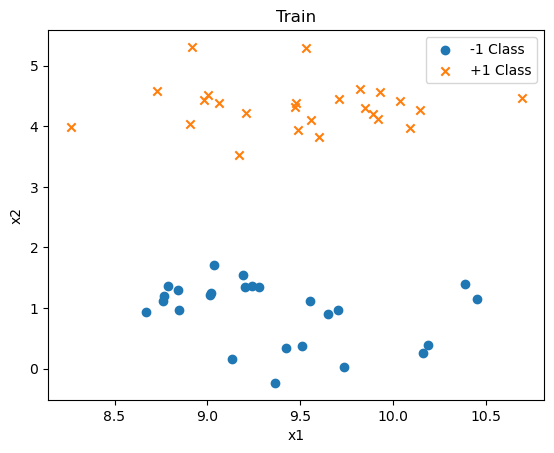

In [2]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train")
plt.show()

In [3]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

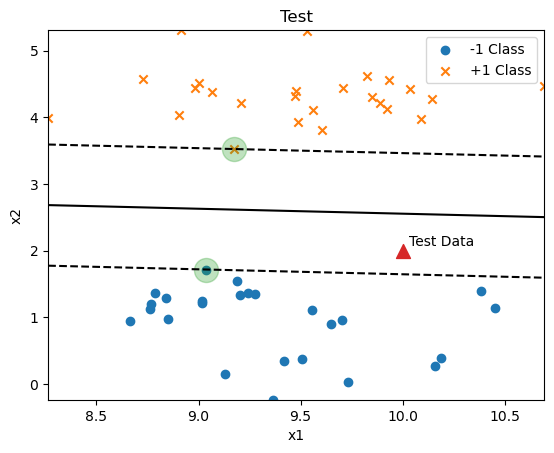

In [4]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 Class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test Data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.title("Test")
plt.show()

In [5]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [6]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

### 2) With Slack

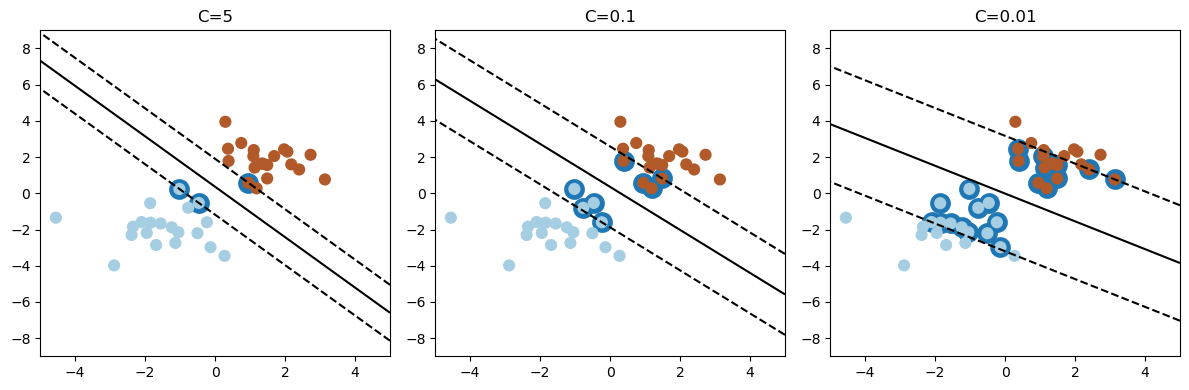

In [7]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plt.figure(figsize=(12, 4))

plotnum = 1
for name, penalty in (('C=5', 5), ('C=0.1', 0.1), ('C=0.01', 0.01)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 3, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.tight_layout()
plt.show()

### 3) With Kernel

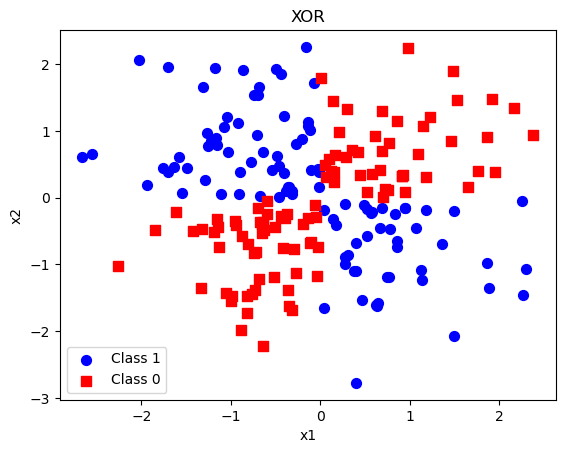

In [8]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='Class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR")
plt.show()

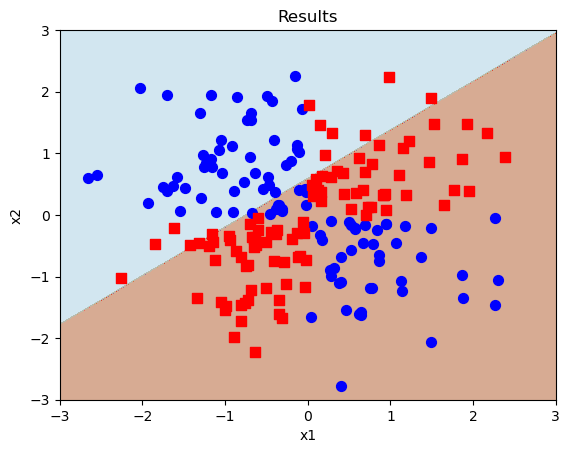

In [9]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap='Paired_r', alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='Class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='Class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "Results")
plt.show()

In [10]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

FunctionTransformer(basis).fit_transform(X)

array([[ 5.56712954e-02,  5.33836138e-01,  2.55949696e+00],
       [ 1.04297611e+00, -3.47917855e-01,  5.80295334e-02],
       [ 1.75408860e-02,  5.57647977e-01,  8.86418357e+00],
       [ 1.10231433e+00,  3.19433346e+00,  4.62833784e+00],
       [ 4.42352954e+00,  4.72751681e+00,  2.52619712e+00],
       [ 3.44457427e+00,  1.43237856e+00,  2.97817405e-01],
       [ 1.53502752e+00,  3.29112074e+00,  3.52810474e+00],
       [ 2.42156164e+00,  3.66709911e+00,  2.77664125e+00],
       [ 2.55955984e-01,  1.57774716e+00,  4.86272297e+00],
       [ 2.84574058e+00,  6.80896636e+00,  8.14586249e+00],
       [ 2.07297163e+01,  8.66921515e+00,  1.81274289e+00],
       [ 1.28950515e+00,  4.40372433e+00,  7.51946900e+00],
       [ 7.27675572e-02, -1.31780820e+00,  1.19326422e+01],
       [ 3.81905977e+00,  6.04475240e+00,  4.78377319e+00],
       [ 2.18295263e-01,  3.50621178e-01,  2.81580115e-01],
       [ 3.40421900e+00,  4.23185790e+00,  2.63035681e+00],
       [ 8.33930652e+00,  1.62573569e+01

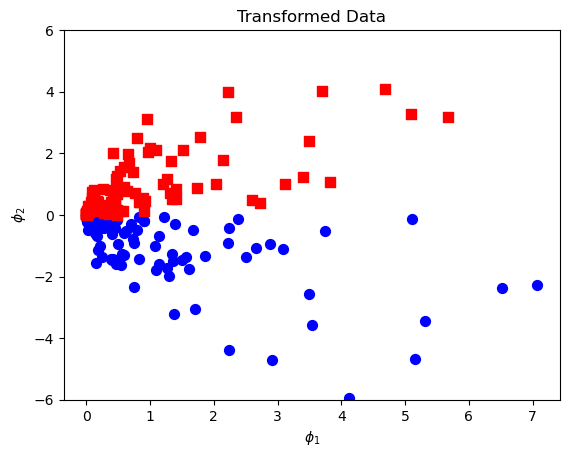

In [11]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("Transformed Data")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

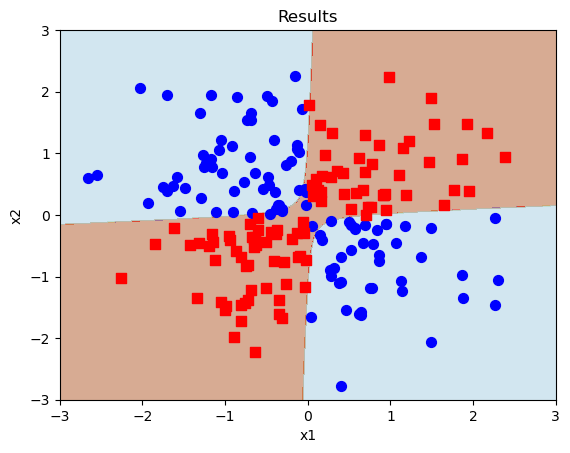

In [12]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Results")
plt.show()

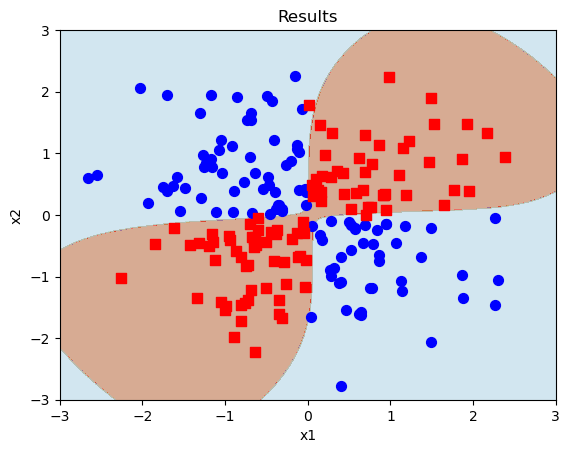

In [13]:
from sklearn.pipeline import Pipeline

kernelmodel = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, kernelmodel, "Results")
plt.show()